In [107]:
import sys

from IPython.display import Image, display

# Perceptrón Simple


Un Perceptrón simple (PS) es la red neuronal más sencilla que se puede considerar, está conformado por una sola neurona que posee N entradas y una función de transferencia de tipo umbral, tal como se ve en la siguiente figura:

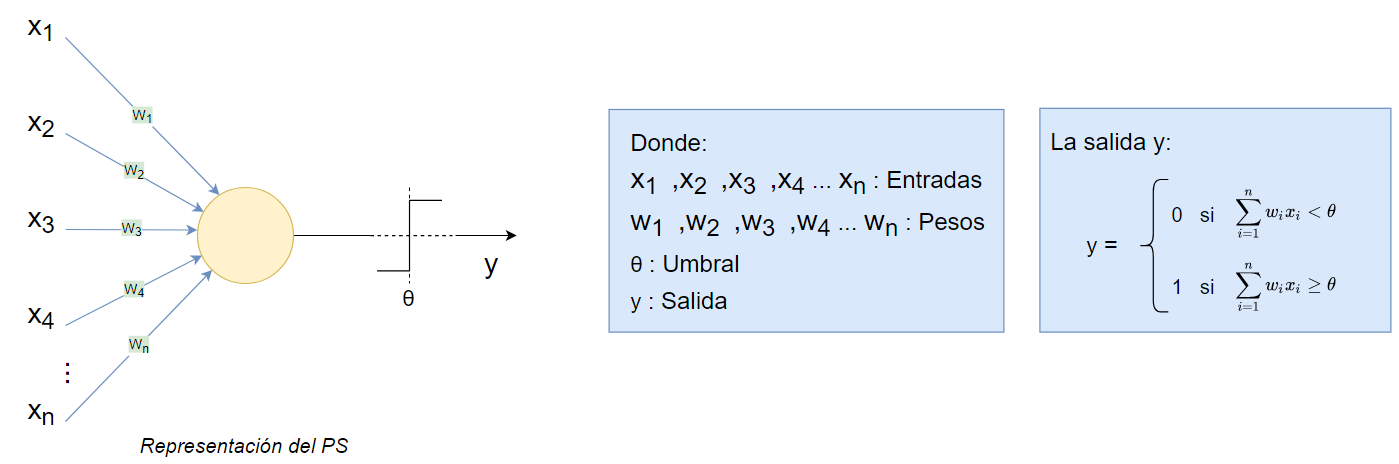

In [108]:
display(Image(filename='./2_imagenes/perceptron.png', width=1000))

Haciendo un pequeño cambio y llevando el umbral $\theta$ hacia la izquierda en las ecuaciones anteriores, podemos definir un nuevo peso
$w_0$ y la entrada $x_0 = 1$ para poder escribir la salida de forma más compacta:

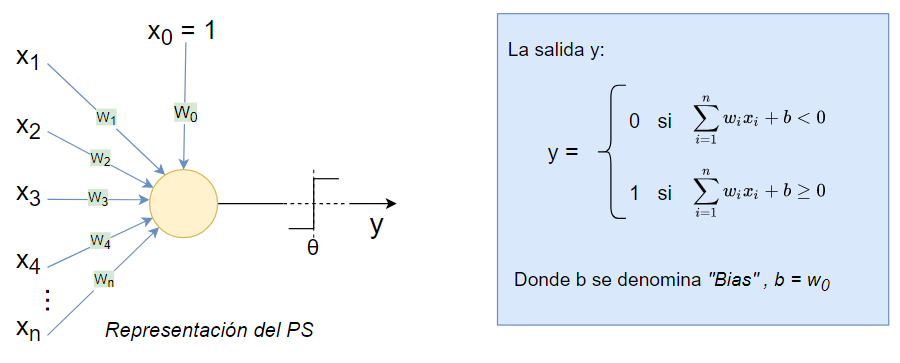

In [109]:
display(Image(filename='./2_imagenes/perceptron_bias.png', width=1000))

Podemos representar la salida con la siguiente expresión: $$y = sign(\sum\limits_{i=0}^N {x_i w_i})$$

_**sign**_ corresponde a la función signo y es la _función de activación_ del perceptrón simple. Más adelante veremos que existen otras funciones de activación para otras aplicaciones.

El PS permite resolver problemas linealmente separables mediante una recta o un hiperplano de separación con ordenada al origen distinta de cero gracias al término de _Bias_

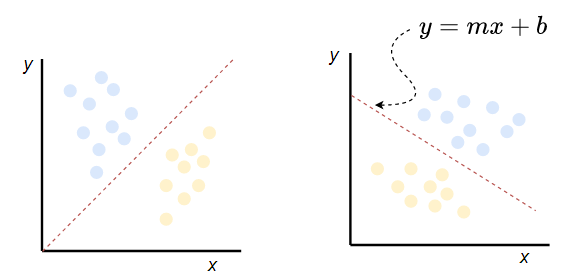

In [110]:
display(Image(filename='./2_imagenes/lineal_separable.png', width=700))

A continuación, vamos a implementar la _clase Perceptron_ y el algoritmo de entrenamiento o _Regla del Perceptrón Simple_ 🙂

Esta regla puede implementarse siguiendo estos pasos:
1. Inicializar el vector de pesos w con valores aleatorios entre 0 y 1.
2. Presentar un patrón de entrada x y calcular la salida o predicción $$y_{pred} = sign(x_0 w_0 + \sum\limits_{i=1}^N {x_i w_i})$$  Recordemos que $w_0$ es el término correspondiente al bias y $x_0=1$, podemos representar la suma de productos usando un producto punto entre vectores: $$y_{pred} = sign( w_0 + \vec{w}^T \cdot \vec{x})$$

3. Calcular el error entre la salida obtenida y la salida real $y_{real}$ $$e = y_{pred} - y_{real}$$
4. Ajustar los pesos de la red con la siguiente ecuación: $$ \vec{w} = \vec{w} + \mu \vec{e} \cdot \vec{x}$$ $\mu$ es el coeficiente de aprendizaje o factor de entrenamiento (eta)
5. Volver al paso 2 y repetir el proceso hasta terminar el número de iteraciones

In [111]:
# Librerías a importar
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [112]:
class Perceptron(object):
    """Perceptrón simple.

    Parámetros
    ------------
    eta : float
        factor de entrenamiento (entre 0.0 y 1.0)
    epocas : int
        iteraciones para el entrenamiento.
    random_state : int
        Semilla generadora de números aleatorios para la inicialización de los pesos.

    Atributos
    -----------
    w_ : 1d-array
        Pesos despues del entrenamiento.
    mal_clasificados_ : list
        Número de desaciertos en cada época
    """
    def __init__(self, eta=0.2, epocas = 50 , random_state=1):
        self.eta = eta
        self.epocas = epocas
        self.random_state = random_state

    def fit(self, X, y):
        """Función de entrenamiento.
        Parameters
        ----------
        X : array, shape = [n_muestras, n_caracteristicas]
          vector de entrenamiento
        y : array, shape = [n_muestras]
          vector target.

        Returns
        -------
        self : objeto

        """

        rgen = np.random.RandomState(self.random_state)
        #inicializo los pesos con valores aleatorios entre 0 y 1 rgen.normal
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.normal.html
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.mal_clasificados_ = []
        self.errores_ = []
        self.error_iteracion = []
        
        # para cada época
        for _ in range(self.epocas):
            errores = 0
            
            for xi, target in zip(X, y):
                salida = self.predict(xi)
                error = target - salida
                actualizar = self.eta * error
                self.w_[1:]+= actualizar * xi
                self.w_[0] += actualizar

                errores += np.abs(error)
                self.error_iteracion.append(error)

            self.mal_clasificados_.append(errores)
            
        return self
                    # cálculo de la salida

                # cálculo del error y actualización del vector de pesos


    def calcular_entrada(self, x):
        """cálculo de la entrada al perceptrón"""
        # -------suma de los productos de los valores de entrada y los pesos -----------
        productos = np.dot(x, self.w_[1:]) + self.w_[0]
        return productos
    
    def predict(self, X):
        """devuelve la etiqueta de la clase pertenciente después de aplicar la fn. de activación"""
        return np.where(self.calcular_entrada(X) >= 0, 1, 0)
        # la función de activación es la función signo:
        # 0 si el resultado de calcular_entrada < 0
        # 1 si el resultado de calcular_entrada >= 0





In [113]:
#ejemplo
X = np.array([[0, 0],
                [0, 1],
                [1, 0],
                [1, 1]])
y = np.array([0, 0, 0, 1])  # Etiquetas esperadas

# Inicializamos el perceptrón
perceptron = Perceptron(epocas=10, random_state=1)

# Entrenamos el modelo
perceptron.fit(X, y)

# Hacemos predicciones
print("Pesos ajustados:", perceptron.w_)
print("Predicciones:", perceptron.predict(X))
print("Errores en cada época:", perceptron.mal_clasificados_)
print('aa:', perceptron.error_iteracion)

Pesos ajustados: [-0.58375655  0.39388244  0.19471828]
Predicciones: [0 0 0 1]
Errores en cada época: [np.int64(2), np.int64(3), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
aa: [np.int64(-1), np.int64(0), np.int64(0), np.int64(1), np.int64(-1), np.int64(-1), np.int64(0), np.int64(1), np.int64(0), np.int64(-1), np.int64(-1), np.int64(1), np.int64(0), np.int64(0), np.int64(-1), np.int64(1), np.int64(0), np.int64(-1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


## Dataset Iris
El conjunto de datos flor Iris contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris versicolor e Iris virginica), en total 150 muestras. Se tienen 4 características: el largo y ancho del sépalo y pétalo, en centímetros.

In [114]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Graficamos el Dataset

Separe los datos en predictores (`X`) y etiquetas (`y`). Considere sólo las clases `setosa`y `versicolor` y los atributos de la primer y tercera columnas como características de entrada, Largo de sépalo (primer columna) y largo de pétalo (tercer columna). Grafique los datos.

In [115]:
df =df[[0,2,4]] #Selecionamos las columnas

#Filtra las clases "setosa" y "versicolor"
df = df[df[4].isin(["Iris-setosa", "Iris-versicolor"])]

df.columns = ["largo_sepalo", "largo_petalo", "clase"] #le cambiamos los nombres a las columnas

df.head()

,largo_sepalo,largo_petalo,clase
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


In [116]:
#convertimos las etiquetas de clases en  0 (Iris-setosa)  y 1 (Iris-versicolor)
df["clase"] = df["clase"].replace({"Iris-setosa": 0, "Iris-versicolor": 1})

df.head(10)

C:\Users\Axel\AppData\Local\Temp\ipykernel_30176\894798936.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["clase"] = df["clase"].replace({"Iris-setosa": 0, "Iris-versicolor": 1})


,largo_sepalo,largo_petalo,clase
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


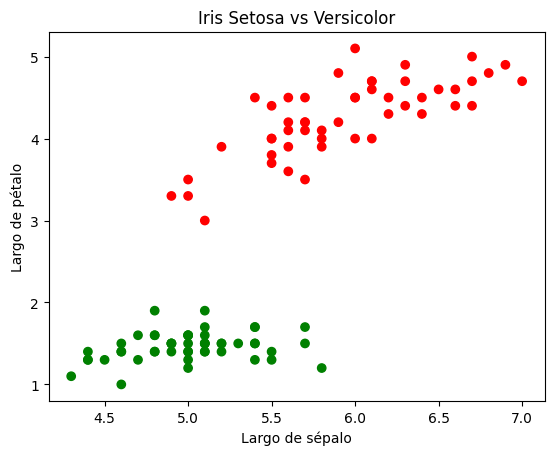

In [117]:
#Graficamos los datos
colors = {0: "green", 1: "red"}
plt.scatter(df["largo_sepalo"], df["largo_petalo"], c= df["clase"].map(colors))
plt.xlabel("Largo de sépalo")
plt.ylabel("Largo de pétalo")
plt.title("Iris Setosa vs Versicolor")
plt.show()

In [118]:
# train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["clase"])
#no se si se refiere a separar asi o de la otra forma



# Asignar predictores a X y etiquetas a y
X = np.array(df.drop('clase', axis=1))  # predictores
y = np.array(df['clase'])  # etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

#Escalamos los datos porque el perceptron es sensible a la escala de los datos
standscaler = StandardScaler()
standscaler.fit(X_train)

#uso transform para que los datos queden escalados:
X_train_std = standscaler.transform(X_train)
X_test_std = standscaler.transform(X_test)



# Entrenamiento del Perceptrón

Utilice la clase implementada para entrenar el perceptrón, pruebe con diferentes valores de coeficiente de entrenamiento y número de épocas.

Haga un gráfico de los mal clasificados por época en función de las épocas y una gráfica de los errores de entrenamiento en cada iteración.

In [119]:
perceptron = Perceptron(eta=0.01, epocas=5, random_state=42)

perceptron.fit(X_train_std, y_train)

predicciones = perceptron.predict(X_test_std)
print(predicciones)
print(perceptron.error_iteracion)

[1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0]
[np.int64(0), np.int64(0), np.int64(0), np.int64(-1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int6

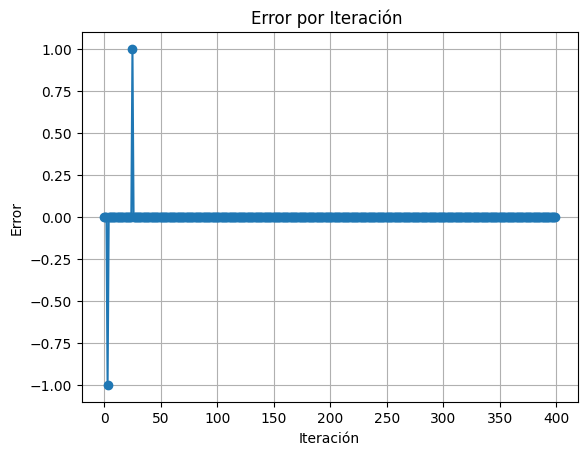

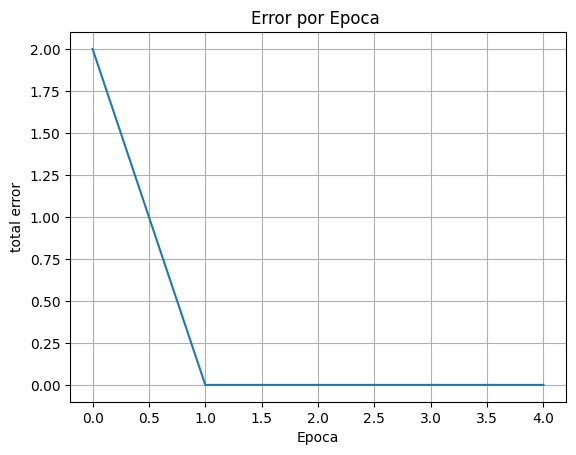

In [120]:
#Instancio un objeto de la clase Perceptron


#llamo al método fit


#Grafico el número de errores o mal clasificados en cada iteración

import matplotlib.pyplot as plt

# Graficar solo los primeros 50 errores por iteración
plt.plot(perceptron.error_iteracion, marker='o')
plt.title('Error por Iteración ')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.show()

#Grafico el número de errores por época
plt.plot(perceptron.mal_clasificados_)
plt.title('Error por Epoca ')
plt.xlabel('Epoca')
plt.ylabel('total error')
plt.grid(True)
plt.show()

Recordemos la ecuación: $$y_{pred} = sign(w_0 + \sum\limits_{i=1}^N {x_i w_i})$$

Para este problema con dos características (x1 = longitudes del sépalo y x2= longitudes de pétalo ), la ecuación resulta:

$$y_{pred} = sign(x_1 w_1 + x_2 w_2 + w_0)$$

Donde se separan las dos clases de flores, tendremos la frontera de decisión, dada por la ecuación:

$$x_1 w_1 + x_2 w_2 + w_0 = 0$$

De esta ecuación podemos despejar la recta $x_2$ en función de $x_1$ que separa las clases en el espacio de soluciones

$$x_2 + x_1 \frac{w_1}{w_2} + \frac{w_0}{w_2} = 0$$

$$x_2 =  -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2} $$

La pendiente de la recta  $ m = -\frac{w_1}{w_2}$ y la ordenada al origen $ b = - \frac{w_0}{w_2}$

### Ahora vamos a graficar esta recta

In [121]:
#------------------ Representación de la recta ------------------------------------
# vector de pesos del perceptrón entrenado

# cálculo de la pendiente

# cálculo de la ordenada al origen

# armo la recta y la grafico junto a los datos



## Perceptrón Usando scikit-learn

Ahora utilice las 3 clases del conjunto de datos usando las mismas características (atributos de la primer y tercera columnas). separe los datos en entrenamiento y prueba (20% datos de prueba), `random_state=100`

Entrene un perceptrón simple usando la clase [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) de scikit-learn.

Utilice la función plot_decision_regions para graficar las regiones de decisión de las 3 clases, grafique los datos de entrenamiento y prueba, diferenciándolos

In [122]:
from modulos.graficacion import plot_decision_regions


Evalúe el desempeño del clasificador

In [123]:
from sklearn.metrics import accuracy_score
